In [1]:
#Dependencies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#PSEUDOCODE:
#read in csvs as DF 
#merge both csvs on cities 
#Avg fare per city - y axis 
#Total rides per city - x-axis
#Total number of drivers per city - s value in scatter plot
#City type -colors

In [3]:
#Read in csv:
file_path_one = "city_data.csv"
file_path_two = "ride_data.csv"

city_df = pd.read_csv(file_path_one)
ride_df = pd.read_csv(file_path_two)
city_df = city_df.sort_values('city',ascending = True)
city_df['type'].value_counts().index

Index(['Urban', 'Suburban', 'Rural'], dtype='object')

In [4]:
#Merge dataframes on city
pyber_df = pd.merge(city_df,ride_df,on = 'city')
pyber_df = pyber_df.sort_values('city',ascending = True)

In [5]:
#Get avg fares per city - Y-AXIS
pyber_gpby = pyber_df.groupby('city')
avg_fare = pyber_gpby['fare'].sum()/pyber_gpby['fare'].count()

#total rides per city - X-AXIS
tot_rides = pyber_gpby['fare'].count()

#total number of drivers per city - S values
tot_drivers = city_df['driver_count']

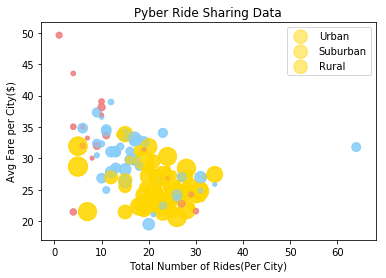

In [59]:
colors = {'Urban':'gold',"Suburban":'lightskyblue','Rural':'lightcoral'}
types = ['Urban','Suburban','Rural']

for i in types:
    plt.scatter(tot_rides, avg_fare, s=tot_drivers*5, c=city_df['type'].apply(lambda x: colors[x]), 
                    alpha=0.5,label = i)

plt.legend()
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Avg Fare per City($)')
plt.title('Pyber Ride Sharing Data')
plt.show()


In [55]:
#PIE CHART - 
explode = (0.2,0.2,0)
colors_list = ['gold','lightskyblue','lightcoral']
fares_sum = pyber_df.groupby('type')['fare'].sum()
ride_count = pyber_df.groupby('type').count()
rides_count = ride_count['city']
drivers_sum = pyber_df.groupby('type')['driver_count'].sum()

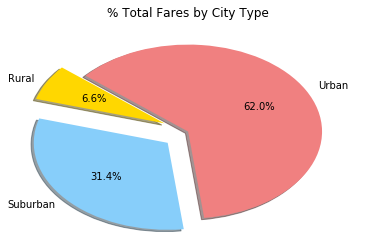

In [56]:
# % Total Fares by City Type:
plt.pie(fares_sum.values, explode = explode, labels=fares_sum.index, colors=colors_list, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Total Fares by City Type')
plt.show()

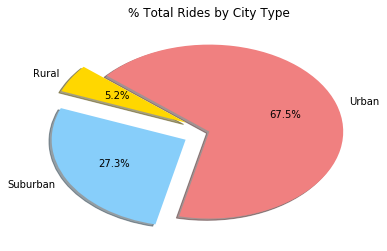

In [57]:
# % Total Rides by City Type:
plt.pie(rides_count.values, explode = explode, labels=rides_count.index, colors=colors_list, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Total Rides by City Type')
plt.show()

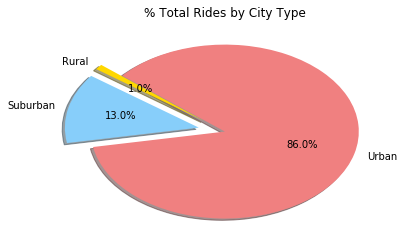

In [11]:
# % Total Drivers by City Type:
plt.pie(drivers_sum.values, explode = explode, labels=drivers_sum.index, colors=colors_list, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Total Rides by City Type')
plt.show()